<h2> Business Problem

<h4> Configurações do notebook

In [1]:
%load_ext autoreload
%autoreload 2
%cd ..

c:\Users\izaia\OneDrive\Documentos\prediction_models\Churn_model


c:\Users\izaia\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import os
os.getcwd()

'c:\\Users\\izaia\\OneDrive\\Documentos\\prediction_models\\Churn_model'

<h4> Importando as bibliotecas

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from src.utils import *
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import warnings

warnings.filterwarnings("ignore")

<h3> 1. Analisando o dataset

- O dataset foi coletado no kaggle. Link: 
- Ele possui informações demográficas e financeiras de clientes de um banco
- A coluna que representa o encerramento da conta bancária pelo cliente (churn) inicialmente chama-se Exited, com o valor 1 represntando churn e 0, não.

In [4]:
#Carregando o dataset
df = pd.read_csv("data/Customer-Churn-Records.csv")

In [5]:
#Visualizando as 5 primeiras linhas
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


<h4> Glossário

1. Row Number: Número da coluna
2. CustomerId: ID do cliente
3. Surname: Sobrenome do cliente
4. CreditScore: Pontuação de crédito do cliente
5. Geography: País do cliente
6. Gender: Gênero do cliente
7. Age: Idade do cliente
8. Tenure: Tempo, em anos, que o indivíduo é cliente do banco
9. Balance: Quantidade monetária na conta do cliente
10. NumOfProducts: Quantidade de produtos bancários adquiridos pelo cliente
11. HasCrCard: Indica se o cliente possui cartão de crédito do banco. 1 para sim, 0 para não.
12. IsActiveMember: Indica se o cliente é um membro ativo
13. EstimatedSalary: Salário estimado do cliente
14. Exited: Informa se o cliente cancelou (churn) sua conta no banco. 1 para sim, 0 para não.
15. Complain: Informa se o cliente iniciou uma reclamação
16. SatisfactionScore: Pontuação dada pelo cliente ao atendimento da reclamação
17. Card Type: Nível do cartão
18. Point Earned: Pontos ganhos pelo cliente em utilização do cartão e outras operações bancárias

Olhando as informações gerais do dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

Há 3 colunas do tipo "Object", duas "float" e 10 inteiras.

In [7]:
#Tamanho do dataset
print(f'O dataset tem {df.shape[0]} linhas e {df.shape[1]} colunas.')

O dataset tem 10000 linhas e 18 colunas.


Olhando agora para as estatísticas númericas do dataset

In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


Insights:

- A idade média dos clientes é de aproximadamente 39 anos. No mínimo 75% dos clientes têm idade igual ou inferior a 44 anos, indicando um perfil mediano de idade
- A média de tempo que os clientes continuam fidelizados ao banco é 5 anos, ou seja, o churn normalmente não acontece no início do vínculo banco-cliente
- Pelo menos 25% das contas possuem saldo zero
- A maioria das pessoas adquiri apenas 1 ou 2 produtos. Poucos chegam a 4
- 48,5% dos clientes são inativos. Isso é uma taxa alta e preocupante para um banco, indicando muitas contas abandonadas e que provavelmente representam uma boa parte do churn

Verificando as estatísticas de colunas nominais

In [9]:
df.describe(include='object')

,Surname,Geography,Gender,Card Type
count,10000,10000,10000,10000
unique,2932,3,2,4
top,Smith,France,Male,DIAMOND
freq,32,5014,5457,2507


- Mais de 50% dos clientes reside na França
- Mais de 50% dos clientes são homens
- Há 4 tipos de cartões

Verificando as colunas duplicadas e com valores nulos

In [10]:
df.isna().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

Não há colunas duplicadas ou com valores nulos

Irei deletar as colunas "RowNumber", "Surname" e "CustomerId", pois não atribuem em nada. Também irei renomear a coluna "Exited" para "Churn", pois é mais intuitivo

In [12]:
df.drop(columns={"RowNumber", "Surname", "CustomerId"}, inplace=True)
df.rename(columns={'Exited': 'Churn'}, inplace=True)

<h2> Separação dos datasets de treino e teste

Afim de evitar qualquer possível vazamentos de dados, irei separar previamente os datasets de treino e teste. 20% dos dados serão reservados para teste

In [13]:
X = df.drop(columns=['Churn'])
y = df['Churn'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

O parâmetro "stratify=y" foi usado para manter a mesma proporção de churn nos dois datasets

In [14]:
#Proporção de churn nos datasets
print(f'Proporcção do treino')
print(f'{y_train.value_counts(normalize=True)}')
print(f'\nProporção do teste')
print(f'{y_test.value_counts(normalize=True)}')

Proporcção do treino
Churn
0    0.79625
1    0.20375
Name: proportion, dtype: float64

Proporção do teste
Churn
0    0.796
1    0.204
Name: proportion, dtype: float64


As variáveis estão proporcionalmente iguais

<h2> Análise Exploratória dos dados

Para ter uma visão clara de como as features estão distribuídas, como elas se relacionam e obter possíveis insights, vou explorar o dataset de treino. Para isso, farei análise univariada, análise bivariada e análise multivariada dos dados.

In [15]:
train = pd.concat([X_train, y_train], axis=1)
train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Churn
4791,709,Spain,Male,35,2,0.00,2,1,0,104982.39,0,2,GOLD,422,0
8881,744,France,Male,29,1,43504.42,1,1,1,119327.75,0,1,PLATINUM,607,0
6166,773,France,Male,64,2,145578.28,1,0,1,186172.85,0,1,SILVER,630,0
4473,646,Germany,Female,29,4,105957.44,1,1,0,15470.91,0,1,PLATINUM,345,0
854,675,France,Female,57,8,0.00,2,0,1,95463.29,0,3,SILVER,632,0


In [16]:
#Separando as colunas para análise
numerical_cols = train.select_dtypes('number').columns.tolist()
categorical_cols = train.select_dtypes('object').columns.tolist()
target = 'Churn'

In [17]:
print(f'Há {len(numerical_cols)} features numéricas. Elas são: {numerical_cols}')
print(f'Há {len(categorical_cols)} features categóricas. Elas são: {categorical_cols}')
print(f'A featura alvo é {target}.')

Há 12 features numéricas. Elas são: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction Score', 'Point Earned', 'Churn']
Há 3 features categóricas. Elas são: ['Geography', 'Gender', 'Card Type']
A featura alvo é Churn.


Antes de prosseguir, irei visualizar a cardinalidade das colunas categóricas.

In [18]:
for feature in categorical_cols:
    print('-' * 40)
    print(df[feature].value_counts(normalize=True))

----------------------------------------
Geography
France     0.5014
Germany    0.2509
Spain      0.2477
Name: proportion, dtype: float64
----------------------------------------
Gender
Male      0.5457
Female    0.4543
Name: proportion, dtype: float64
----------------------------------------
Card Type
DIAMOND     0.2507
GOLD        0.2502
SILVER      0.2496
PLATINUM    0.2495
Name: proportion, dtype: float64


- Para as features de Gender e Geography, o mais indicado será usar o One-Hot Encoding, pois as duas não carregam consigo uma hierarquia e possuem cardinalidade baixa
- Diferente das outras duas, o Card Type claramente possui hierarquia, por isso será usado Ordinal Encoder como transformação

<h3> 1. Análise univariada

De início, começarei com a análise univariada a qual consiste em explorar cada feature individualmente com o objetivo de entender os seus comportamentos.

<h4> 1.1 Target

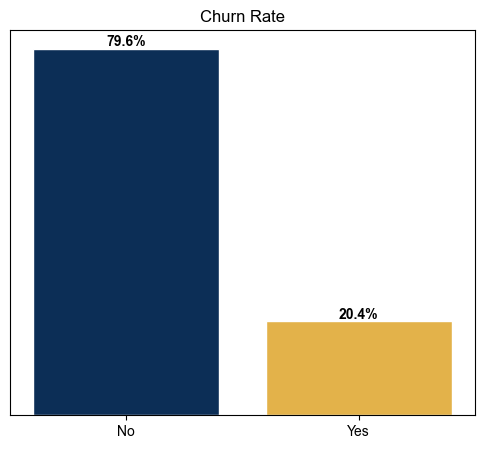

In [19]:
fig = plot_feature_rate(train, ['Churn'])

- Apenas 20,4% dos clientes realizam o churn. A variável está desbalanceada e passará por tratamento.

<h4> 1.2 Features binárias

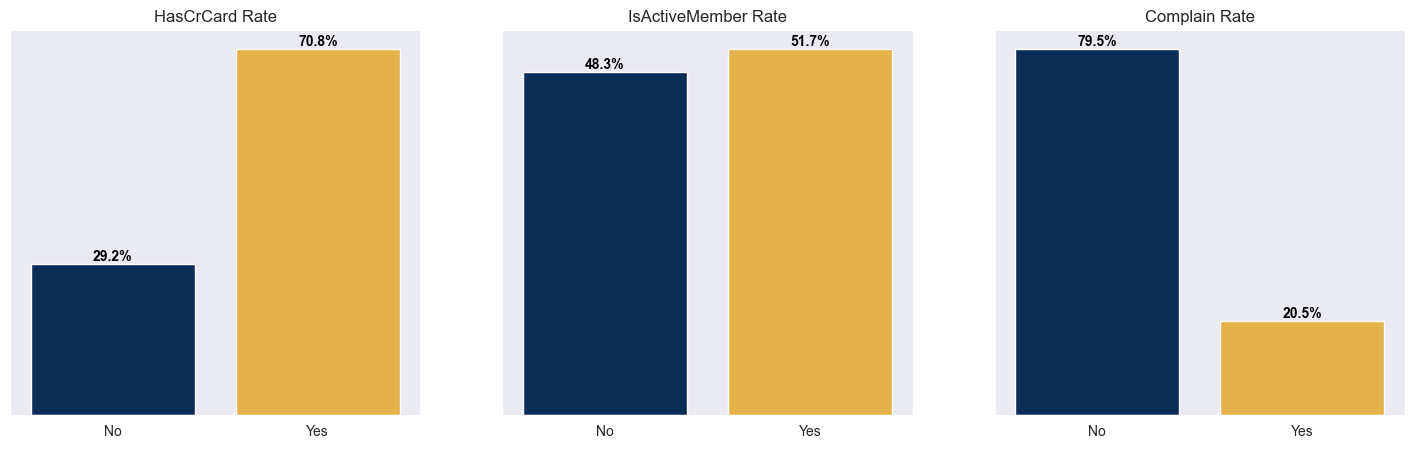

In [20]:
fig = plot_feature_rate(train, ["HasCrCard", "IsActiveMember", "Complain"])

- 70,5% dos clientes têm cartão de crédito.
- Como já dito anteriormente, apenas 51,5% dos clientes é membro ativo, um número alarmante para a empresa.
- A porcentagem de reclamação é igual a de churn (20,4% para churn e 79,6% para não churn), o que pode representar uma correlação perfeita e influenciar na performance do modelo.

<h4> 1.3 Features numéricas

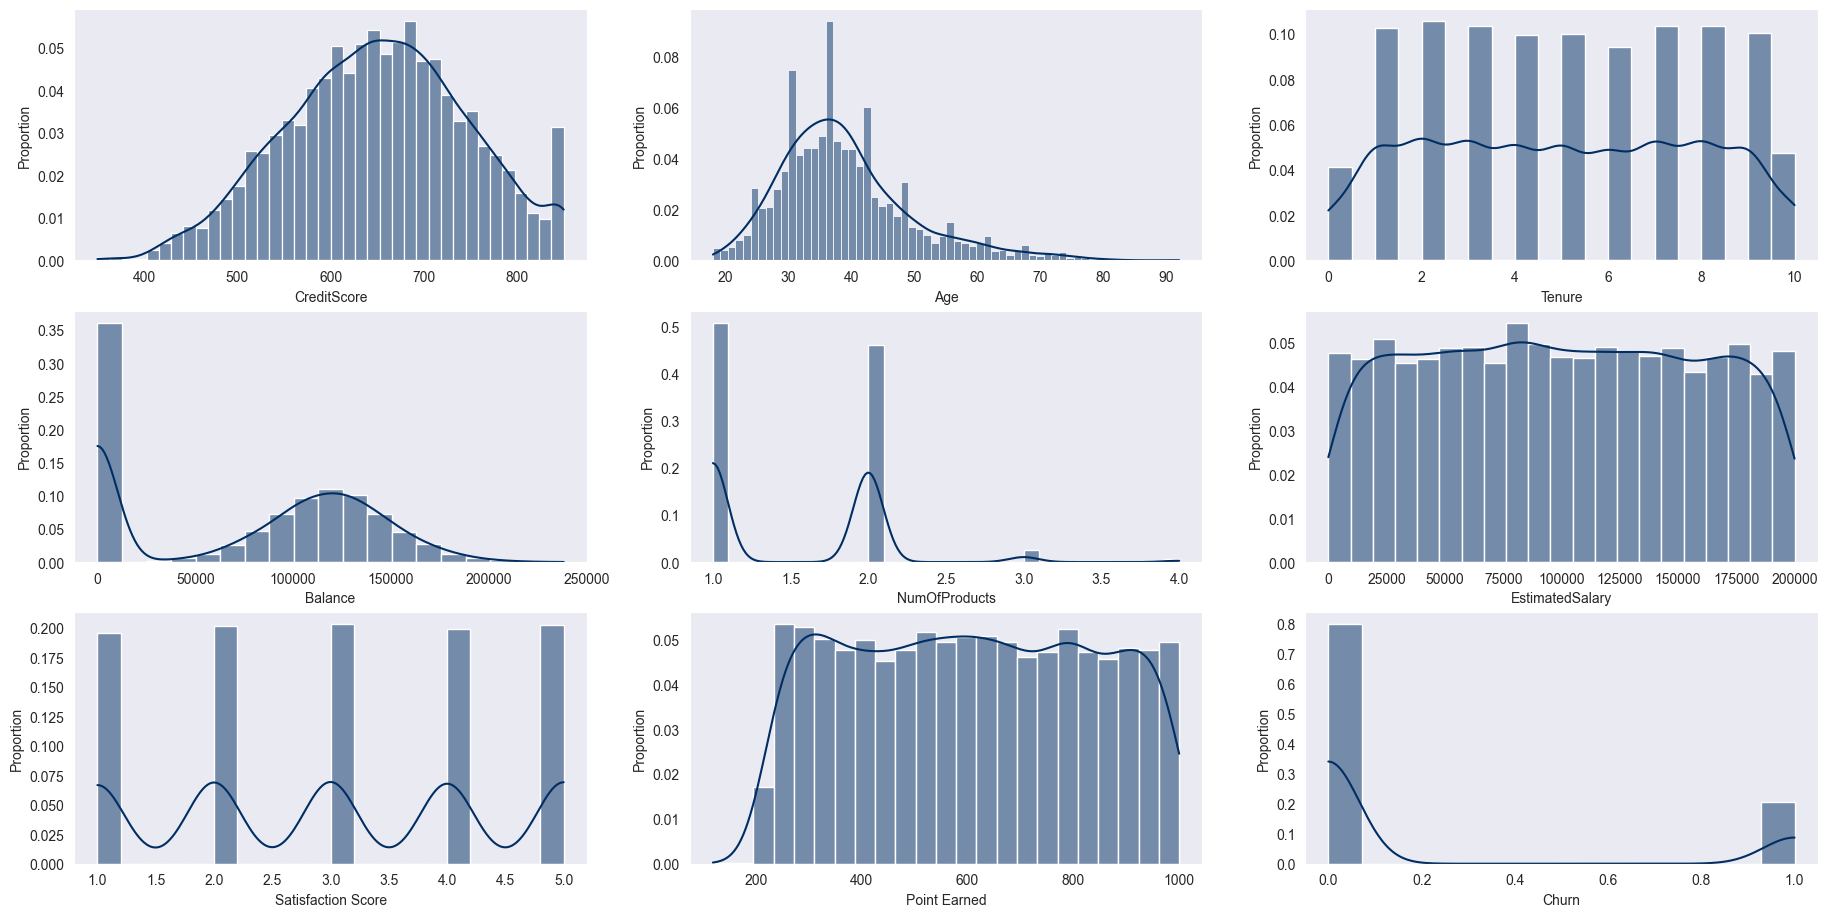

In [21]:
fig = plot_feature_distribuition(train, list(f for f in numerical_cols if f not in ["HasCrCard", "IsActiveMember", "Complain"]))

- A distribuição da idade é assimétrica a direita, com a maioria dos clientes possuindo entre 30 e 40 anos, com picos altíssimos de 6% e 8% nos extremos desse intervalo, respectivamente. Há uma queda brusca após os 50 anos, o que sugere que o banco não consegue reter bem clientes mais velhos.
- Mais de 35% dos clientes tem "Balance" 0, e logo depois há um salto para a casa dos 50 mil. Esse grupo com saldo 0 provavelmente são clientes que estão abandonando o banco, e represantando assim uma boa parte do churn.
- A maior parte dos clientes possui 1 ou 2 produtos. Clientes com 3 ou 4 são raríssimos, com porcentagens próximas a 0.
- O EstimatedSalary e o Point Earned são uniformemente distribuídos
- O SatisfactionScore também tem distribuição uniforme, pois está atrelada a variável complain. Com isso, ela não se mostra tão relevante individualmente

<h4> 1.4 Features nominais

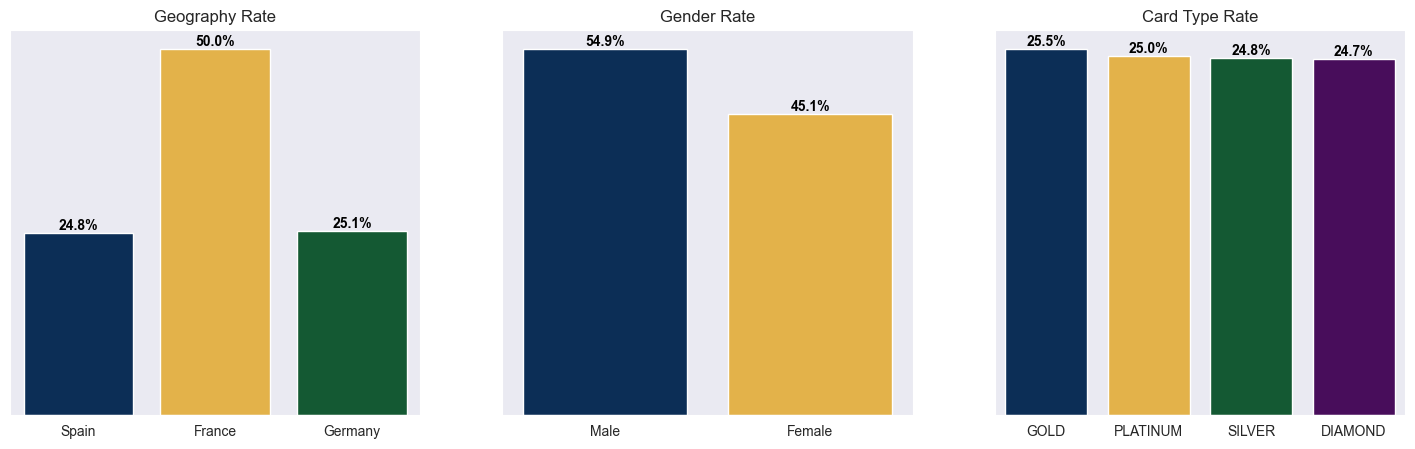

In [22]:
fig = plot_feature_rate(train, categorical_cols)

- Há apenas 3 países que acomodam os clientes do banco: Alemanha, França e Espanha. Como já dito, mais da metade reside na França, enquanto os outros 50% estão quase igualmente distribuídos na Alemanha e Espanha.
- Como também dito anteriormente, a maior parte dos clientes são do sexo masculino.
- O Card Type Rate possui apenas 4 valores com proporções praticamente idênticas.

Observando os últimos gráficos nota-se que há apenas 4 tipos de cartões, os quais 100% clientes possui. Porém, quando olhamos para a coluna "HasCrCard", estatisticamente 29,4% dos clientes não possui cartão bancário, apresentando uma inconsistência nos dados

Como resultado da análise acima, irei fazer o seguinte:
- Criar uma nova categoria na variável "Card Type Rate" para registros que contém 0 na coluna "HasCrCard"

In [23]:
train.loc[df['HasCrCard'] == 0, "Card Type"] = 'No card'

Visualindo o gráfico mais uma vez

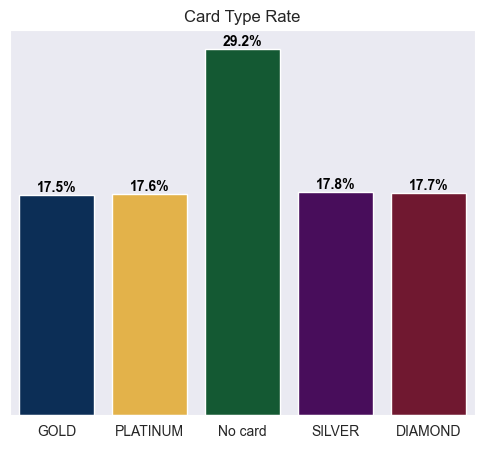

In [24]:
fig = plot_feature_rate(train, ['Card Type'])

A incosistência foi resolvida e as proporções continuam praticamente iguais mesmo com 29,4% dos dados agora serem de pessoas sem cartão

<h4> 1.5 Outliers

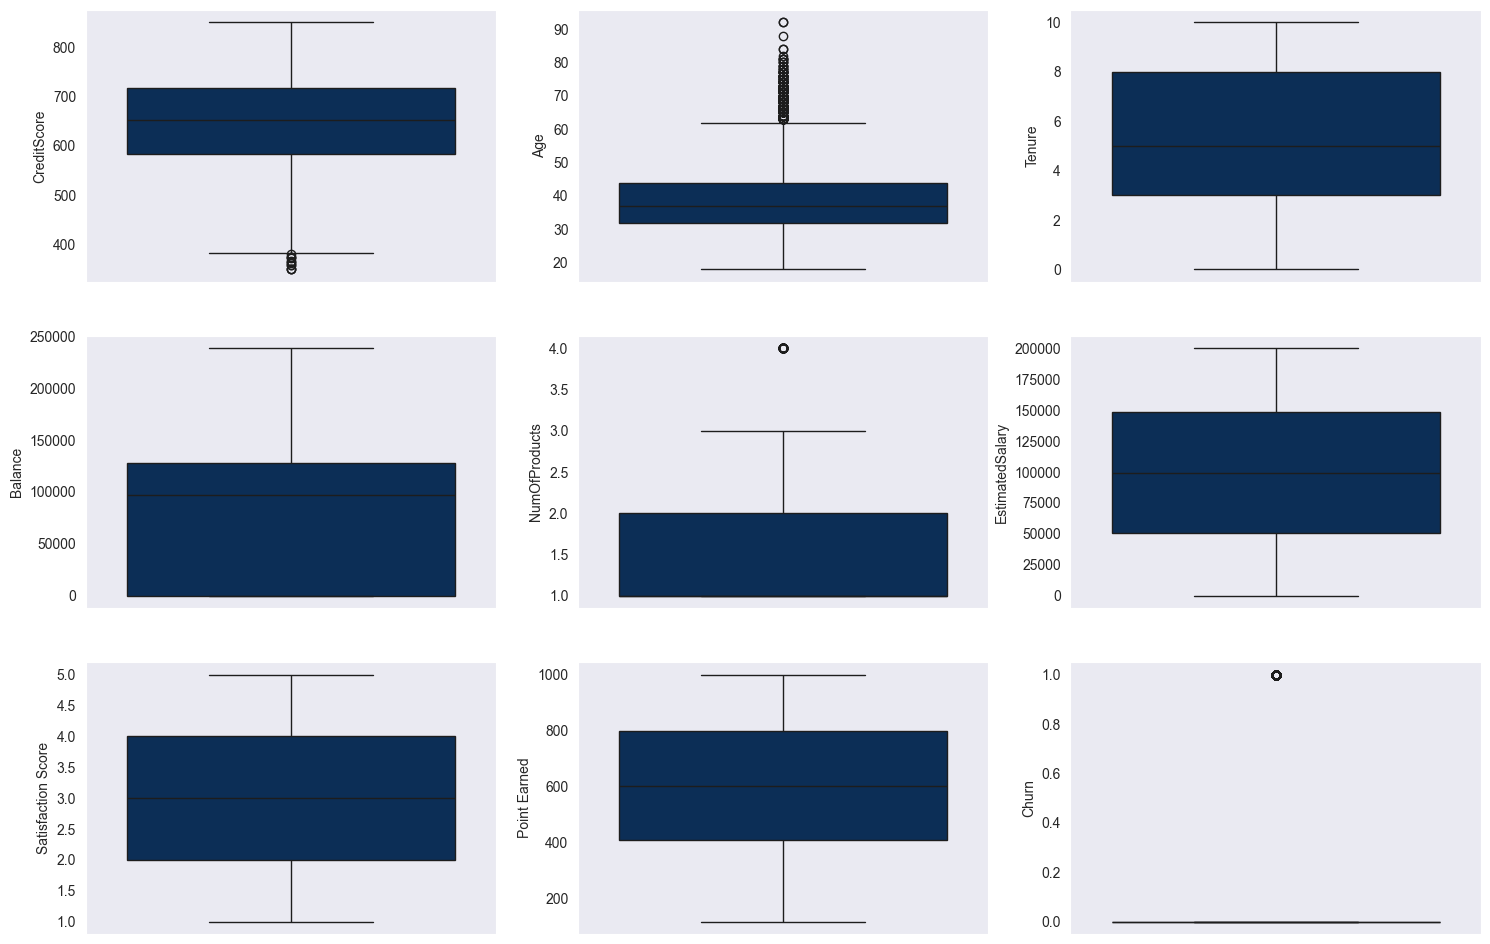

In [25]:
fig = plot_feature_box_plot(train, list(f for f in numerical_cols if f not in ["HasCrCard", "IsActiveMember", "Complain"]), target=None)

Há apenas 3 features que possuem outliers e mesmo assim em números baixos. Como eles não apresentam inconsistência, não irei removê-los.

<h3> Análise Bivariada e multivariada

<h4> 1. Matriz de correlação

Vou olhar a matriz de correlação para encontrar possíveis relações lineares e suas forças entre os dados, especialmente em relação a variável alvo

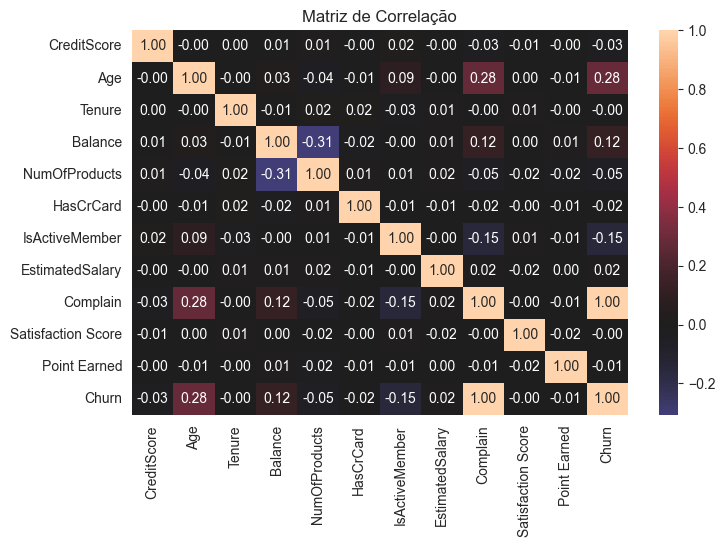

In [26]:
corr = train.corr(numeric_only=True)

plt.figure(figsize=(8, 5))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    center=0,
)
plt.title("Matriz de Correlação")
plt.show()

Insights:
- A maior parte das variáveis tem correlação proximas à 0, ou seja, não possuem relação linear.
- Existe uma correlação perfeita entre o churn e o 'Complain'. Isso indica que todo cliente que iniciou uma reclamação, cancelou sua conta. Isso fica mais visível ainda quando percebe-se que Churn e Complain tem a mesma taxa de corralação com as outras variáveis (Ex: 0.28 com Age).
- Curiosamente, clientes com maior saldo tendem a sair, embora a relação linear seja fraca.
- Clientes que tem saldo menor tendem a adquirir mais produtos.

Como Churn e Complain possuem correlação perfeita, o modelo pode acabar sendo enviesado. Para isso não ocorrer irei remover a variável complain do dataset de treino e teste, assim como o SatisfactionScore, já que ele também está ligado a Complain

In [27]:
#Excluindo as colunas Complain e Satisfaction Score
train.drop(columns={"Complain", "Satisfaction Score"}, inplace=True)

In [28]:
#Atualizando a lista de colunas numéricas
numerical_cols = train.select_dtypes('number').columns.tolist()

<h4> 1.2 Features numéricas pelo churn

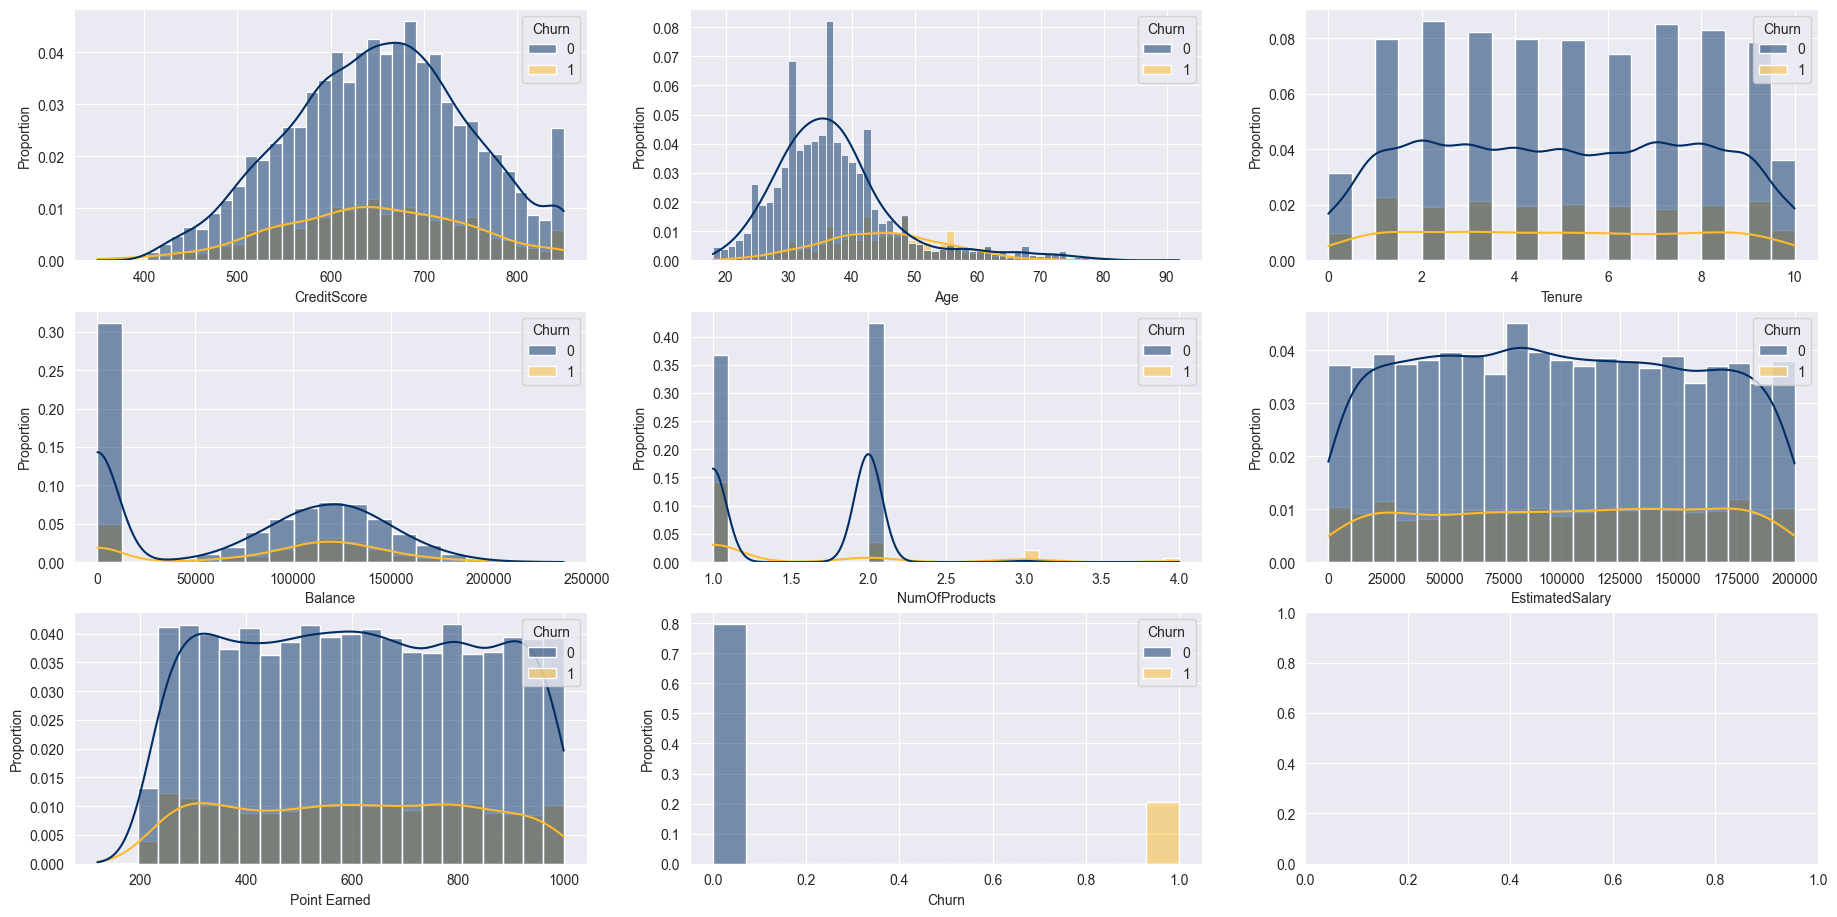

In [29]:
fig = plot_feature_distribuition(train, list(f for f in numerical_cols if f not in ["HasCrCard", "IsActiveMember"]), target='Churn')

- Pessoas entre 40 e 50 tendem a dar churn mais do que em outras faixas etárias
- O número de clientes que obteve 3 NumOfProducts e deu churn, é maior que o número de clintes que obtiveram a mesma quantidade e não deu churn.
- Pessoas que deram churn costuman ter as categorias 'NumOfProducts' abaixo de 4, principalmente em 1.


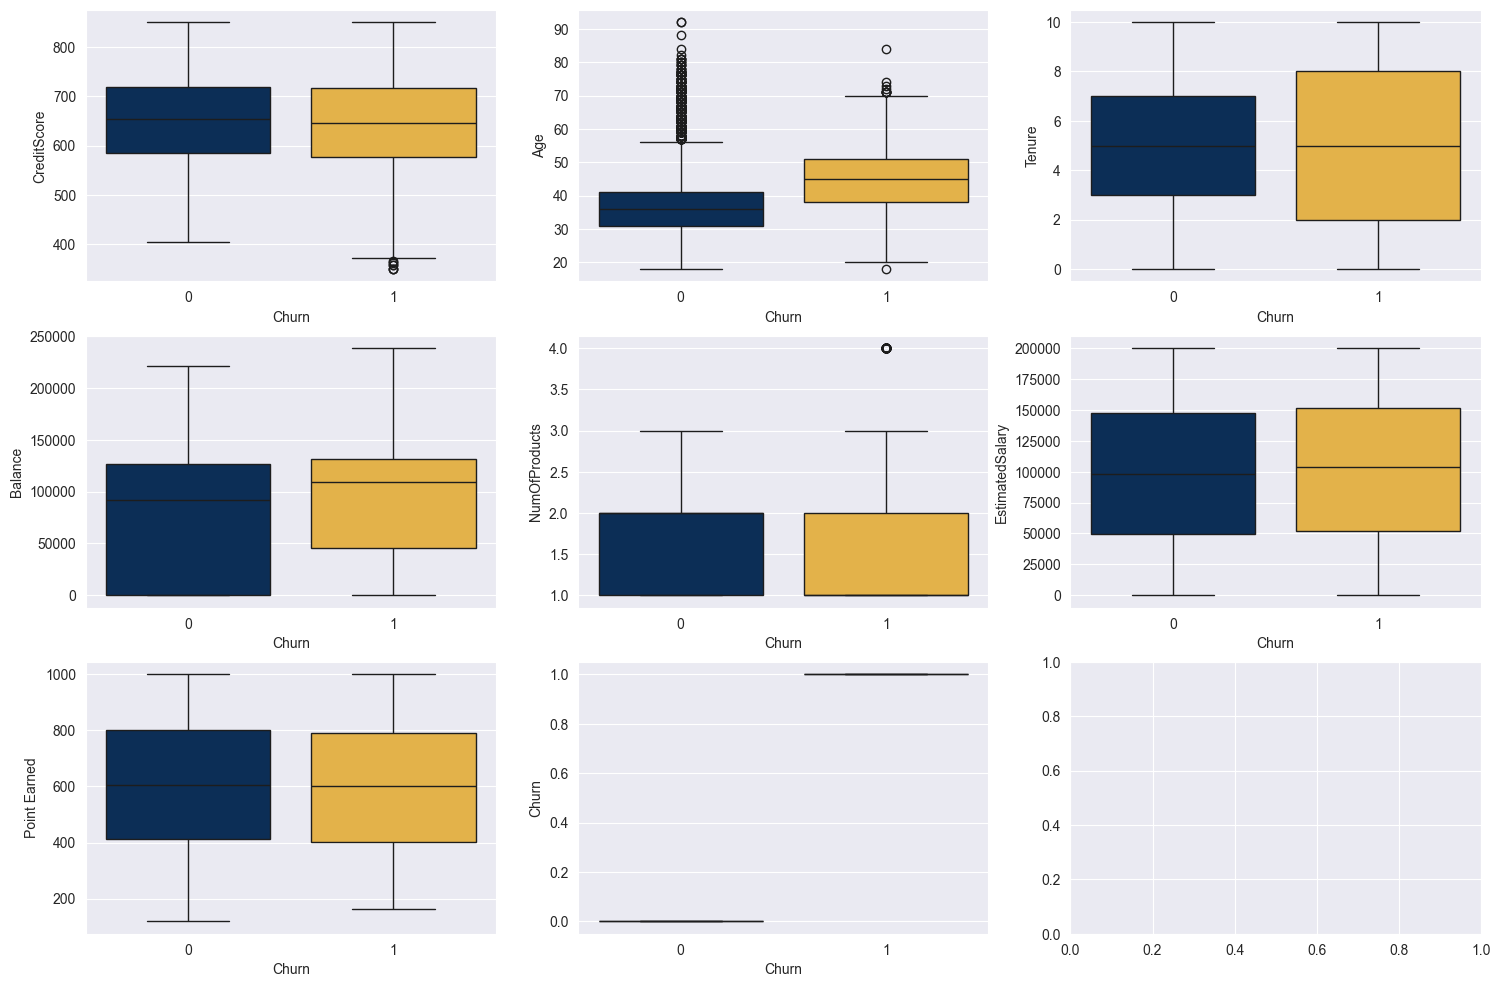

In [30]:
fig = plot_feature_box_plot(train, list(f for f in numerical_cols if f not in ["HasCrCard", "IsActiveMember"]), target='Churn')

Insights:
- Existe um segmento de clientes acima dos 60 anos que se mantém fieis ao banco, apesar da tendência de churn nessa faixa etária
- Ter 4 produtos é raríssimo e todos os clientes que tem, cancelaram sua conta com o banco.
- Clientes com Score baixo normalmente saem
- EstimatedSalary, Balance, Point Earned e Tenure não possuem outliers.

<h4> 1.3 Features categóricas em relação ao churn

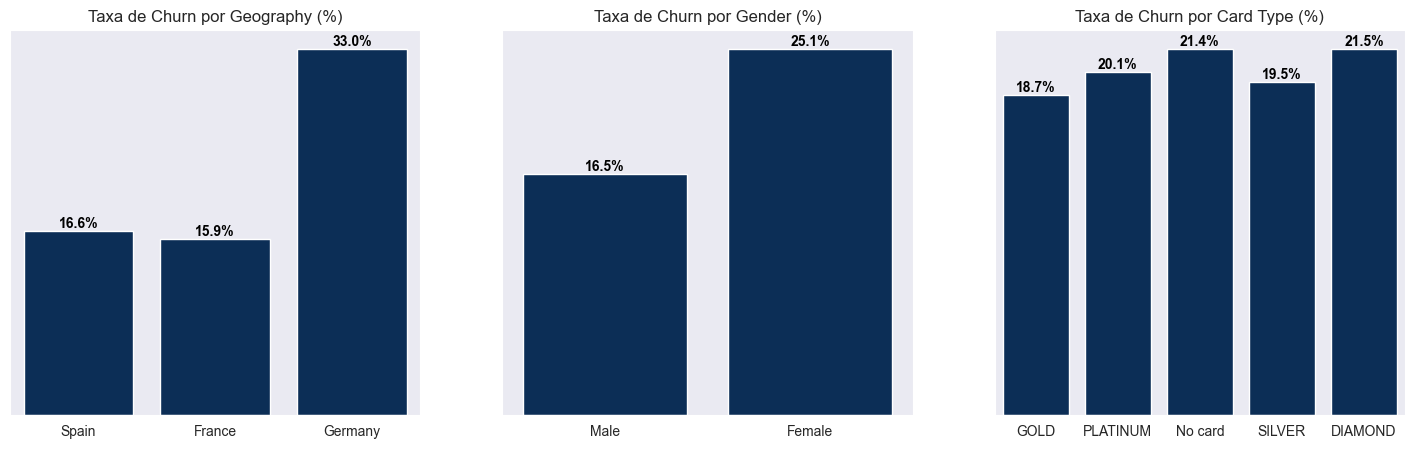

In [31]:
fig = plot_feature_target_rate(train, categorical_cols, 'Churn')

- Embora a França seja o país com maior taxa de clientes, proporcionalmente a Alemanha possui quase o dobro de churn do que a França. É essencial que o banco procure investigar o motivo dessa rejeição severa na Alemanha.
- A proporção de mulheres que dão churn também é significativamente maior do que a quantidade de homens, mesmo sendo a minoria no total. Também é importante que o banco investigue o motivo dessa não retenção do público feminino
- Os cartões possuem taxa de churn relativamente iguais
- Clientes que não tem cartão possuem a maior taxa de cancelamente, empatados tecnicamente com o cartão diamond, sugerindo que o banco tem dificuldade em manter clientes que não possuem cartão

In [32]:
#Salvando o dataset atualizado em um csv
train.to_csv("data/Newdata.csv", index=False)

<h3> Conclusão